Importing all necessary libtaries

In [1]:
import pandas as pd # data analysis library
import numpy as np # numerical computing library
from matplotlib import pyplot as plt # plotting library
import seaborn as sns # statistical data visualization library

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,auc
import shap
import numpy as np

c:\Users\USER\Desktop\ML_Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
label=LabelEncoder()
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False)

Load the required dataset

In [3]:
bad_debt_df=pd.read_excel('Data.xlsm',sheet_name='DataV2') # Load data from Excel file Original Data

In [4]:
additional_df=pd.read_excel('Additional_Info.xlsx') # Load additional data from another Excel file

In [5]:
additional_df.drop_duplicates(inplace=True)

In [6]:
merge_df_1=pd.merge(bad_debt_df, additional_df, on="Customer", how="inner")

In [7]:
merge_df_1.shape

(89513, 99)

In [8]:
merge_df_1['OUTCOME'].value_counts()
merge_df_1.drop(merge_df_1[merge_df_1['OUTCOME']=='Rejected - Policy Decline'].index, inplace=True)

In [9]:
merge_df_1['Target']=label.fit_transform(merge_df_1['OUTCOME'])
merge_df_1.drop(['OUTCOME'],axis=1,inplace=True)

In [10]:
merge_df_1['Target'].value_counts()

Target
1    81987
0     7499
Name: count, dtype: int64

CR21 VS CR22

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\4055614648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\4055614648.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


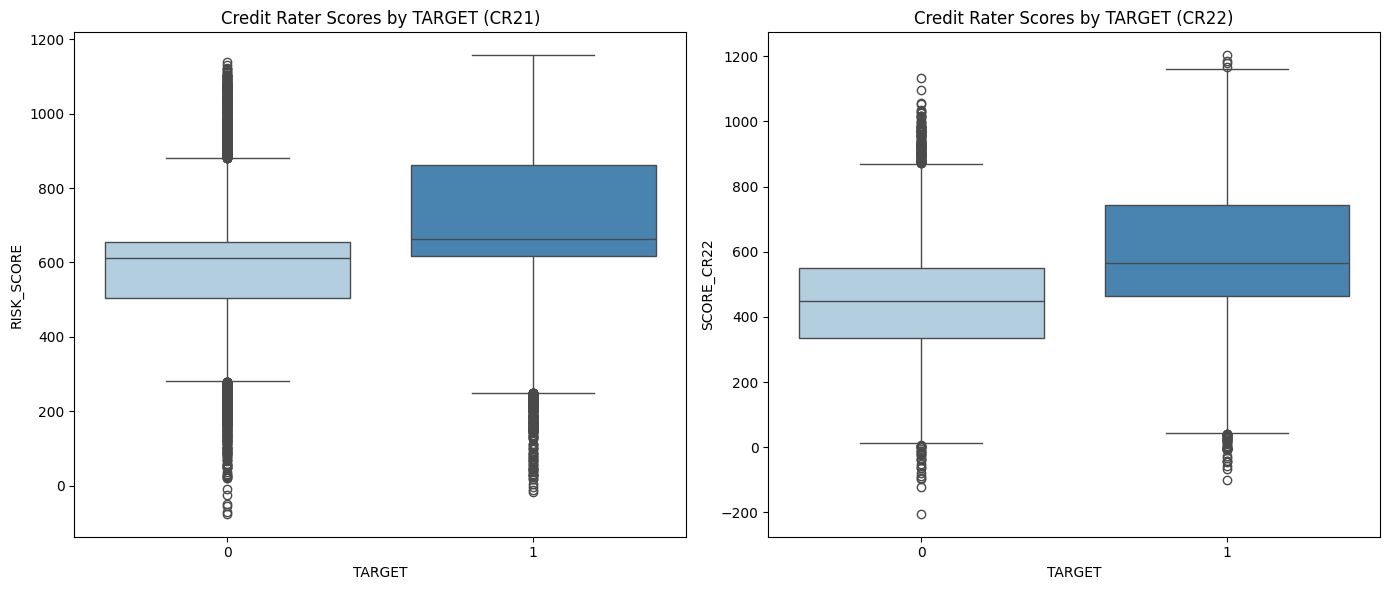

In [11]:
plt.figure(figsize=(14, 6))

# ---- Plot 1: CR21 (RISK_SCORE) ----
plt.subplot(1, 2, 1)
sns.boxplot(
    x='Target',
    y='RISK_SCORE',
    data=merge_df_1,
    palette='Blues'
)
plt.title('Credit Rater Scores by TARGET (CR21)')
plt.xlabel('TARGET')
plt.ylabel('RISK_SCORE')

# ---- Plot 2: CR22 (SCORE_CR22) ----
plt.subplot(1, 2, 2)
sns.boxplot(
    x='Target',
    y='SCORE_CR22',
    data=merge_df_1,
    palette='Blues'
)
plt.title('Credit Rater Scores by TARGET (CR22)')
plt.xlabel('TARGET')
plt.ylabel('SCORE_CR22')

plt.tight_layout()
plt.show()


Customer Credit Account Activity Analysis (CR21)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1882753171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1882753171.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1882753171.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


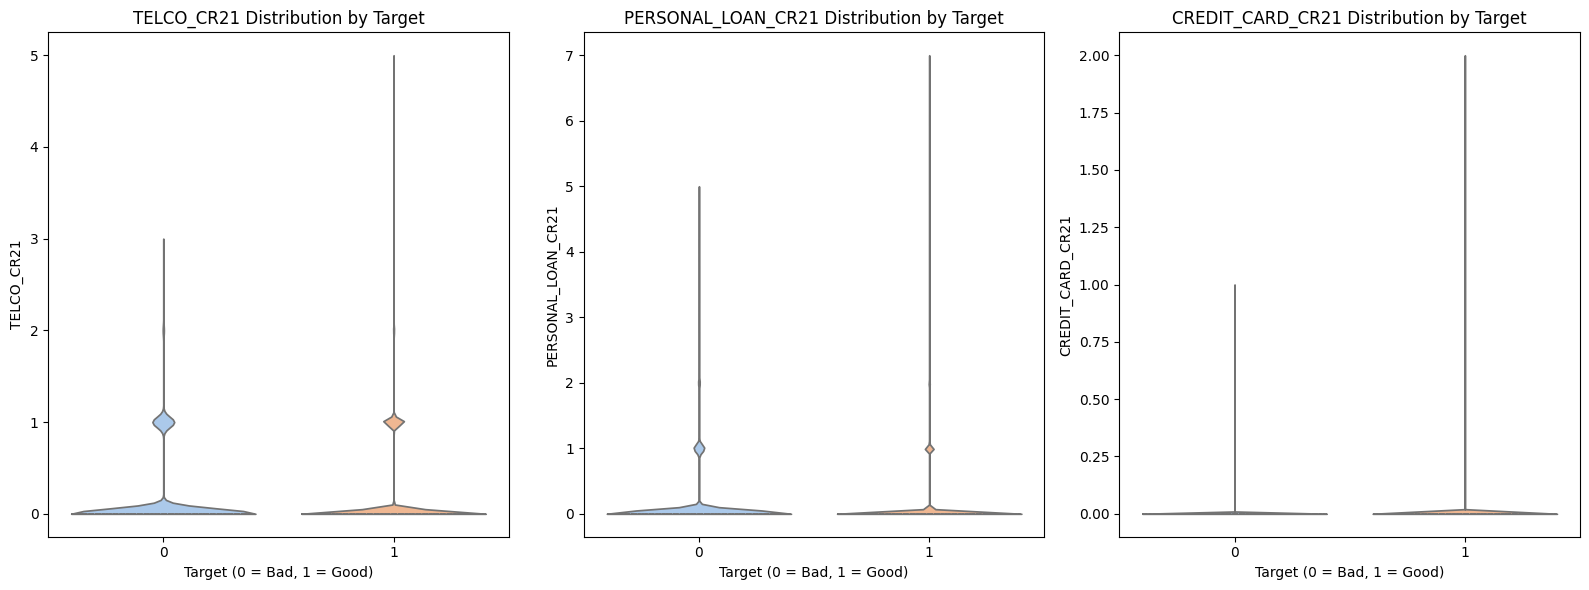

In [12]:
plt.figure(figsize=(16, 6))


# ---- TELCO_CR21 ----
plt.subplot(1, 3, 1)
sns.violinplot(
    x='Target',
    y='TELCO_CR21',
    data=merge_df_1,
    palette='pastel',
    inner='quartile',
    cut=0
)
plt.title('TELCO_CR21 Distribution by Target')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('TELCO_CR21')

# ---- PERSONAL_LOAN_CR21 ----
plt.subplot(1, 3, 2)
sns.violinplot(
    x='Target',
    y='PERSONAL_LOAN_CR21',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('PERSONAL_LOAN_CR21 Distribution by Target')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('PERSONAL_LOAN_CR21')

# ---- CREDIT_CARD_CR21 ----
plt.subplot(1, 3, 3)
sns.violinplot(
    x='Target',
    y='CREDIT_CARD_CR21',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('CREDIT_CARD_CR21 Distribution by Target')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('CREDIT_CARD_CR21')

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3265517749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3265517749.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3265517749.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


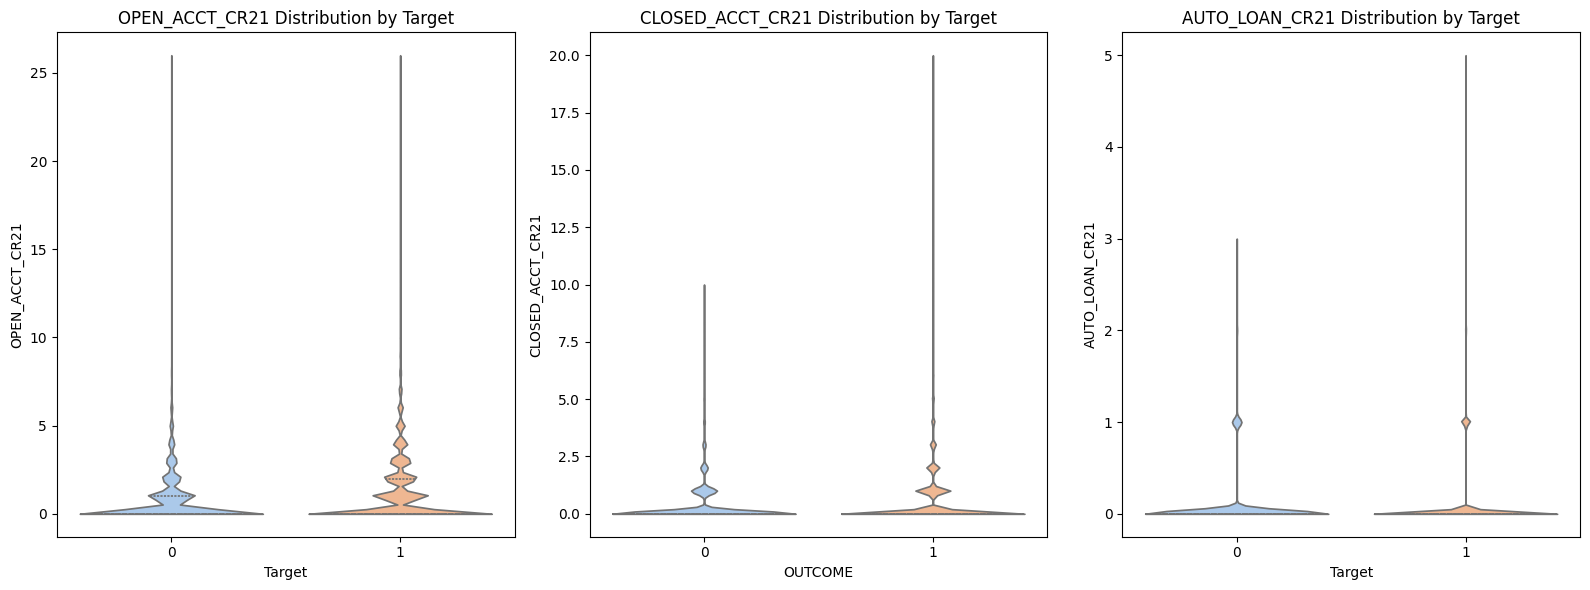

In [13]:
plt.figure(figsize=(16, 6))

# ---- OPEN_ACCT_CR21 ----
plt.subplot(1, 3, 1)
sns.violinplot(
    x='Target',
    y='OPEN_ACCT_CR21',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('OPEN_ACCT_CR21 Distribution by Target')
plt.xlabel('Target')
plt.ylabel('OPEN_ACCT_CR21')

# ---- CLOSED_ACCT_CR21 ----
plt.subplot(1, 3, 2)
sns.violinplot(
    x='Target',
    y='CLOSED_ACCT_CR21',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('CLOSED_ACCT_CR21 Distribution by Target')
plt.xlabel('OUTCOME')
plt.ylabel('CLOSED_ACCT_CR21')

# ---- CREDIT_CARD_CR21 ----
plt.subplot(1, 3, 3)
sns.violinplot(
    x='Target',
    y='AUTO_LOAN_CR21',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('AUTO_LOAN_CR21 Distribution by Target')
plt.xlabel('Target')
plt.ylabel('AUTO_LOAN_CR21')

plt.tight_layout()
plt.show()


Customer Credit Account Activity Analysis (CR22)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2565753705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2565753705.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2565753705.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


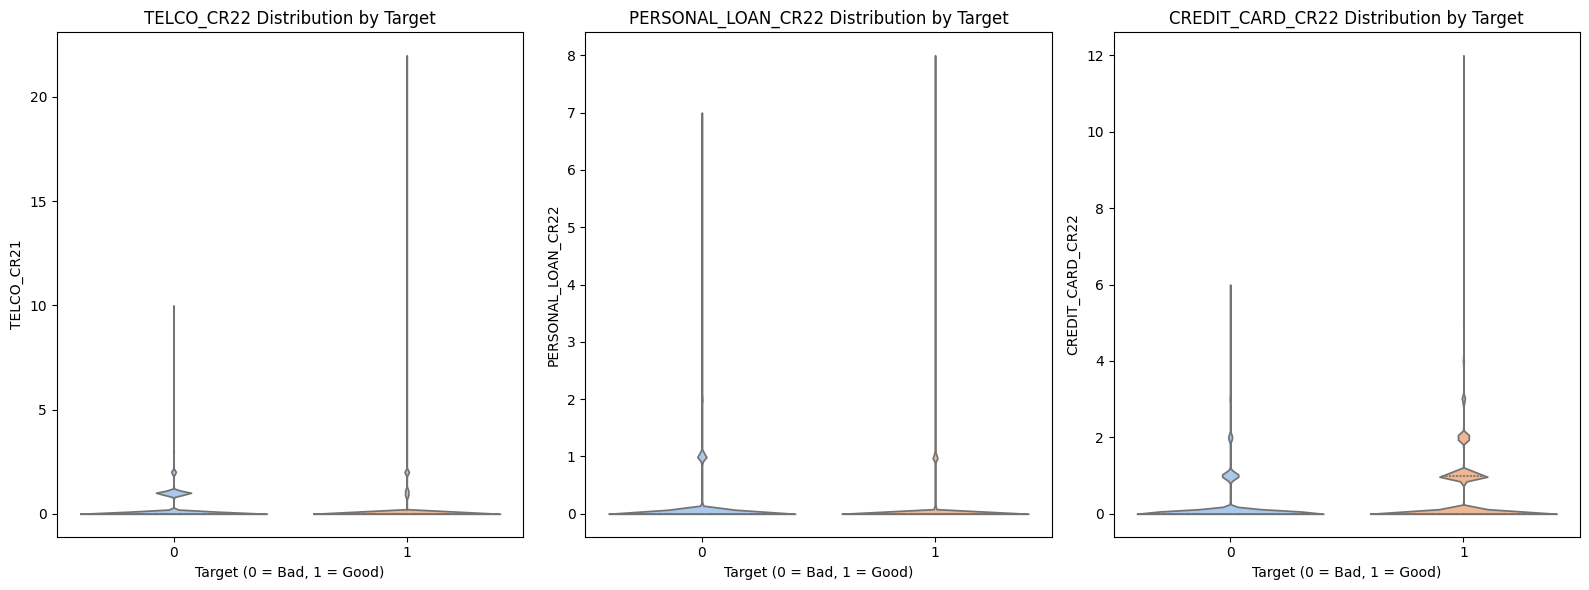

In [14]:
plt.figure(figsize=(16, 6))


# ---- OPEN_ACCT_CR22 ----
plt.subplot(1, 3, 1)
sns.violinplot(
    x='Target',
    y='TELCO_CR22',
    data=merge_df_1,
    palette='pastel',
    inner='quartile',
    cut=0
)
plt.title('TELCO_CR22 Distribution by Target')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('TELCO_CR21')

# ---- CLOSED_ACCT_CR22 ----
plt.subplot(1, 3, 2)
sns.violinplot(
    x='Target',
    y='PERSONAL_LOAN_CR22',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('PERSONAL_LOAN_CR22 Distribution by Target')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('PERSONAL_LOAN_CR22')

# ---- CREDIT_CARD_CR22 ----
plt.subplot(1, 3, 3)
sns.violinplot(
    x='Target',
    y='CREDIT_CARD_CR22',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('CREDIT_CARD_CR22 Distribution by Target')
plt.xlabel('Target (0 = Bad, 1 = Good)')
plt.ylabel('CREDIT_CARD_CR22')

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3468185449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3468185449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3468185449.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


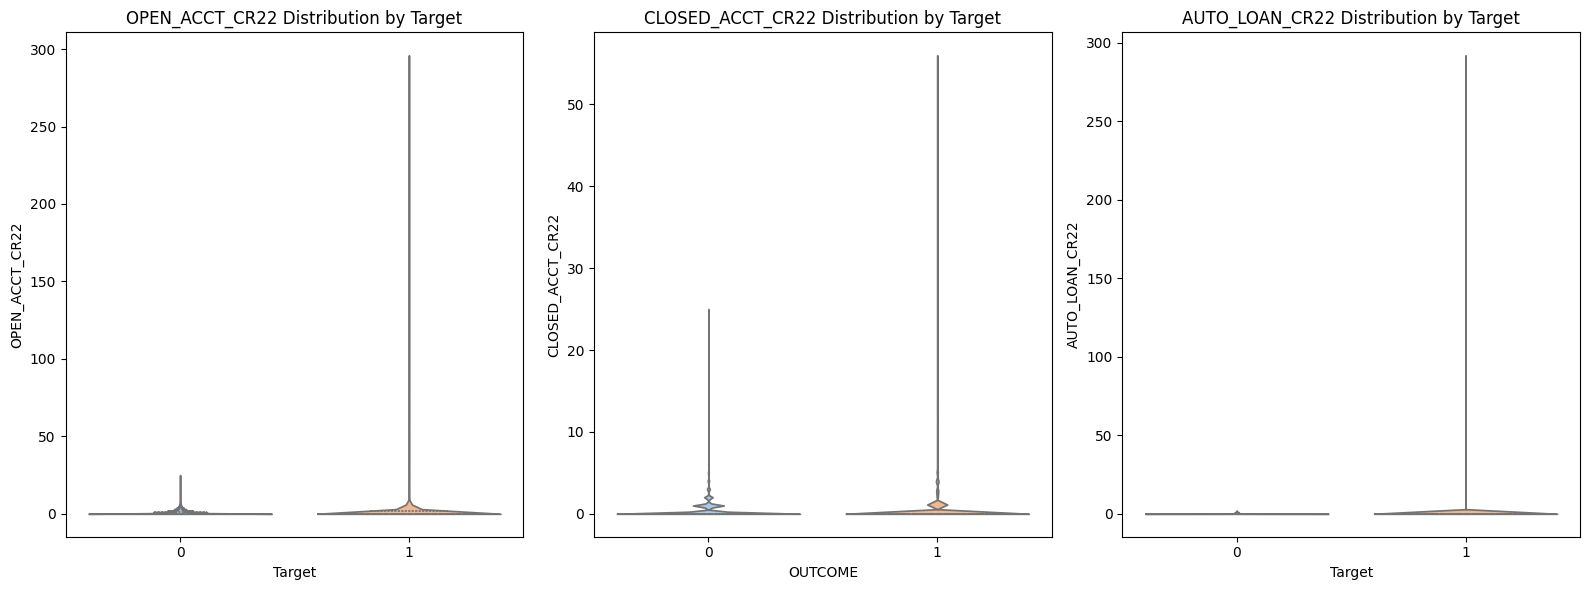

In [15]:
plt.figure(figsize=(16, 6))

# ---- OPEN_ACCT_CR22 ----
plt.subplot(1, 3, 1)
sns.violinplot(
    x='Target',
    y='OPEN_ACCT_CR22',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('OPEN_ACCT_CR22 Distribution by Target')
plt.xlabel('Target')
plt.ylabel('OPEN_ACCT_CR22')

# ---- CLOSED_ACCT_CR22 ----
plt.subplot(1, 3, 2)
sns.violinplot(
    x='Target',
    y='CLOSED_ACCT_CR22',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('CLOSED_ACCT_CR22 Distribution by Target')
plt.xlabel('OUTCOME')
plt.ylabel('CLOSED_ACCT_CR22')

# ---- CREDIT_CARD_CR22 ----
plt.subplot(1, 3, 3)
sns.violinplot(
    x='Target',
    y='AUTO_LOAN_CR22',
    data=merge_df_1,
    inner='quartile',
    palette='pastel',
    cut=0
)
plt.title('AUTO_LOAN_CR22 Distribution by Target')
plt.xlabel('Target')
plt.ylabel('AUTO_LOAN_CR22')

plt.tight_layout()
plt.show()


Risk Relative

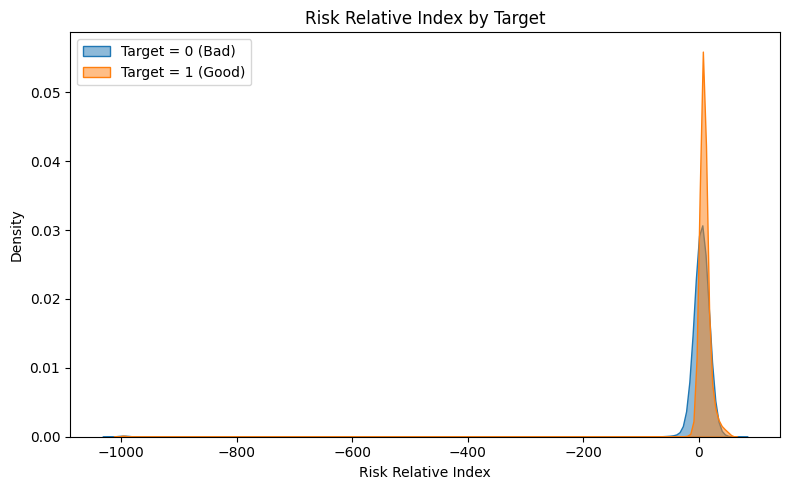

In [16]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=merge_df_1[merge_df_1['Target'] == 0],
    x='RISK_RELATIVE_CR21',
    label='Target = 0 (Bad)',
    fill=True,
    alpha=0.5
)

sns.kdeplot(
    data=merge_df_1[merge_df_1['Target'] == 1],
    x='RISK_RELATIVE_CR21',
    label='Target = 1 (Good)',
    fill=True,
    alpha=0.5
)

plt.title('Risk Relative Index by Target')
plt.xlabel('Risk Relative Index')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
def winsorize_columns(df, cols, lower_q=0.05, upper_q=0.95):
   
    df = merge_df_1

    # Allow single column or multiple columns
    if isinstance(cols, str):
        cols = [cols]

    for col in cols:
        lower_cap = df[col].quantile(lower_q)
        upper_cap = df[col].quantile(upper_q)

        # axis=0 is default (row-wise), explicit for clarity
        df[col] = df[col].clip(lower=lower_cap, upper=upper_cap, axis=0)

    return df


In [18]:
winsorize_columns(merge_df_1, 'RISK_RELATIVE_CR21', lower_q=0.05, upper_q=0.95)

,Customer,RISK_SCORE,BUREAU_ENQUIRIES_12_MONTHS,LICENCE_AVAILABLE,RESIDENTIAL,BUREAU_DEFAULT,CD_OCCUPATION,CD_STS_RESIDENTIAL_x,DEFAULT_AMT,ENQUIRIES_6M,...,DOC_TYPE,VISA_TYPE,EMPLOYED_STATUS,EMPLOYED_TYPE,EMPLOYED_NO_MTHS,NO_ADDRESS_AT_MONTHS,CD_STS_RESIDENTIAL_y,AGENCY_AMT,MTH_TILL_AGENCY,Target
0,2975536526,628,queries 12 Months 1-2,Driver Licence Check Missing,Rented,Default Current- Missing,E,R,0,2,...,Intl Passport and Visa,Work Visa,E,F,1.0,1.0,R,NaN,NaN,1
1,2999806086,813,queries 12 Months 1-2,Driver Licence Check Yes,Rented,Default Current- Missing,E,R,0,2,...,AU Driver Licence,Resident,E,F,86.0,49.0,R,NaN,NaN,1
2,2800835182,1012,queries 12 Months 4-5,Driver Licence Check Yes,Owned,Default Current- Missing,E,O,0,5,...,AU Driver Licence,Resident,E,F,61.0,129.0,O,NaN,NaN,1
3,2975640662,415,queries 12 Months 4-5,Driver Licence Check Missing,Rented,Default Current1-1000,E,R,459,2,...,Intl Passport and Visa,Resident,E,F,15.0,60.0,R,NaN,NaN,1
4,2979232086,556,queries 12 Months 1-2,Driver Licence Check Missing,Board or Living With Relative,Default Current- Missing,U,B,0,2,...,Intl Passport and Visa,Work Visa,U,U,0.0,1.0,B,60.01,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89508,2999821794,1043,queries 12 Months 1-2,Driver Licence Check Yes,Owned,Default Current- Missing,R,O,0,2,...,AU Driver Licence,Resident,R,U,0.0,120.0,O,NaN,NaN,1
89509,2811821694,589,queries 12 Months 6,Driver Licence Check Yes,Rented,Default Current- Missing,E,R,0,3,...,AU Driver Licence,Resident,E,F,1.0,6.0,R,NaN,NaN,1
89510,2971478930,746,queries 12 Months 3,Driver Licence Check Missing,Owned,Default Current- Missing,S,O,0,3,...,AU Passport,Resident,S,F,0.0,125.0,O,NaN,NaN,1
89511,2974937898,868,queries 12 Months 1-2,Driver Licence Check Yes,Rented,Default Current- Missing,U,R,0,2,...,AU Driver Licence,Resident,U,U,0.0,274.0,R,304.39,4.0,0


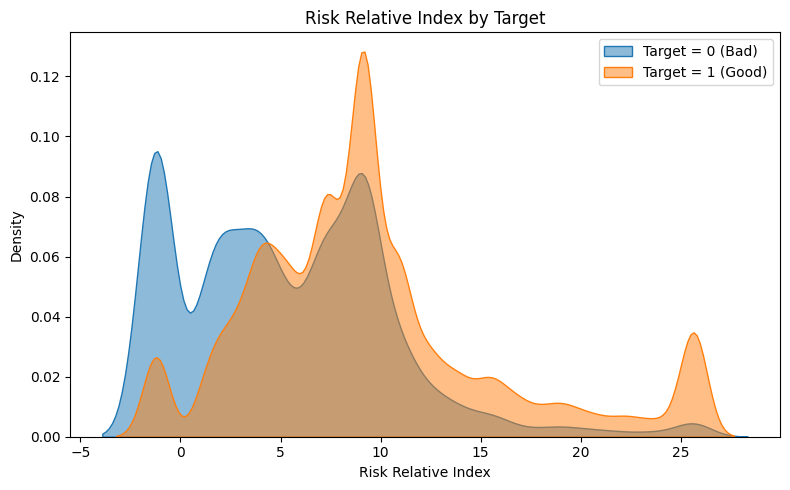

In [19]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=merge_df_1[merge_df_1['Target'] == 0],
    x='RISK_RELATIVE_CR21',
    label='Target = 0 (Bad)',
    fill=True,
    alpha=0.5
)

sns.kdeplot(
    data=merge_df_1[merge_df_1['Target'] == 1],
    x='RISK_RELATIVE_CR21',
    label='Target = 1 (Good)',
    fill=True,
    alpha=0.5
)

plt.title('Risk Relative Index by Target')
plt.xlabel('Risk Relative Index')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
merge_df_1.dtypes[merge_df_1.dtypes == 'object']

BUREAU_ENQUIRIES_12_MONTHS    object
LICENCE_AVAILABLE             object
RESIDENTIAL                   object
BUREAU_DEFAULT                object
CD_OCCUPATION                 object
CD_STS_RESIDENTIAL_x          object
NO_STATUS_VCR183              object
CD_STS_VCR184                 object
SCORECARD                     object
SCORE_INDICATOR_CR22          object
SCORE_BAND_CR22               object
SCORECARD_CR21                object
DOC_TYPE                      object
VISA_TYPE                     object
EMPLOYED_STATUS               object
EMPLOYED_TYPE                 object
CD_STS_RESIDENTIAL_y          object
dtype: object

In [21]:
merge_df_1.isnull().sum()[merge_df_1.isnull().sum() > 0]

SCORE_INDICATOR_CR22         609
SCORE_CR22                   609
SCORE_BAND_CR22              609
SCORECARD_CR21                30
NO_SCORE_y                    30
RISK_RELATIVE_CR21            30
RISK_RELATIVE_ODDS_CR21       30
DOC_TYPE                    1370
VISA_TYPE                   1359
EMPLOYED_STATUS             8017
EMPLOYED_TYPE               8017
EMPLOYED_NO_MTHS            8017
NO_ADDRESS_AT_MONTHS         223
CD_STS_RESIDENTIAL_y         231
AGENCY_AMT                 80866
MTH_TILL_AGENCY            80866
dtype: int64

In [22]:
#agency not need so drop that 
merge_df_1.drop(['AGENCY_AMT','MTH_TILL_AGENCY'],axis=1,inplace=True)

In [23]:
merge_df_1.describe()

,Customer,RISK_SCORE,DEFAULT_AMT,ENQUIRIES_6M,ENQUIRIES_12M,DEROGATORIES,DEFAULTS_12M,NO_MONTHS_VCR221,NO_MONTHS_VCR228,NO_MONTHS_VCR226,...,WORST_1M,WORST_3M,WORST_6M,WORST_12M,WORST_18M,WORST_24M,HAD_SERVICES,EMPLOYED_NO_MTHS,NO_ADDRESS_AT_MONTHS,Target
count,8.948600e+04,89486.000000,8.948600e+04,89486.000000,89486.000000,89486.000000,89486.000000,89486.00000,89486.000000,89486.000000,...,89486.000000,89486.000000,89486.000000,89486.000000,89486.000000,89486.000000,89486.000000,81469.000000,89263.000000,89486.000000
mean,2.907788e+09,720.163199,2.488793e+02,2.600742,2.966542,0.254487,0.008202,0.16987,10.022875,0.321313,...,0.177905,0.239144,0.287039,0.363711,0.462665,0.531044,0.980422,24.652236,36.583321,0.916199
std,3.797935e+08,180.016247,4.432667e+03,1.441680,2.141055,1.410049,0.106868,0.97174,11.187649,1.640734,...,0.778760,0.888990,0.969393,1.087106,1.218035,1.311271,0.138547,40.676674,51.797822,0.277090
min,4.001728e+08,-76.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000
25%,2.975624e+09,614.000000,0.000000e+00,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2.985551e+09,660.000000,0.000000e+00,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,12.000000,1.000000
75%,2.995853e+09,843.000000,0.000000e+00,3.000000,3.000000,0.000000,0.000000,0.00000,24.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,33.000000,56.000000,1.000000
max,3.006335e+09,1157.000000,1.017272e+06,125.000000,239.000000,253.000000,8.000000,12.00000,24.000000,24.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,720.000000,948.000000,1.000000


In [24]:
merge_df_1.columns

Index(['Customer', 'RISK_SCORE', 'BUREAU_ENQUIRIES_12_MONTHS',
       'LICENCE_AVAILABLE', 'RESIDENTIAL', 'BUREAU_DEFAULT', 'CD_OCCUPATION',
       'CD_STS_RESIDENTIAL_x', 'DEFAULT_AMT', 'ENQUIRIES_6M', 'ENQUIRIES_12M',
       'DEROGATORIES', 'DEFAULTS_12M', 'NO_MONTHS_VCR221', 'NO_STATUS_VCR183',
       'CD_STS_VCR184', 'NO_MONTHS_VCR228', 'NO_MONTHS_VCR226',
       'NO_SUM_VCR053', 'NO_MONTHS_VCR258', 'SCORECARD', 'NO_SCORE_x',
       'SCORE_INDICATOR_CR22', 'SCORE_CR22', 'SCORE_BAND_CR22',
       'SCORECARD_CR21', 'NO_SCORE_y', 'RISK_RELATIVE_CR21',
       'RISK_RELATIVE_ODDS_CR21', 'NO_MONTHS_OLDEST_ACCOUNT', 'OPEN_ACCT_CR22',
       'CLOSED_ACCT_CR22', 'MORTGAGE_CR22', 'CREDIT_CARD_CR22', 'TELCO_CR22',
       'UTILITIES_CR22', 'OVERDRAFT_CR22', 'PERSONAL_LOAN_CR22',
       'AUTO_LOAN_CR22', 'CREDIT_CARD_AMT_CR22', 'OVERDRAFT_AMT_CR22',
       'PERSONAL_LOAN_AMT_CR22', 'AUTO_LOAN_AMT_CR22', 'OPEN_ACCT_CR21',
       'CLOSED_ACCT_CR21', 'MORTGAGE_CR21', 'CREDIT_CARD_CR21', 'TELCO_CR2

DATA PREPROCESSING

In [25]:
merge_df_1.head()

,Customer,RISK_SCORE,BUREAU_ENQUIRIES_12_MONTHS,LICENCE_AVAILABLE,RESIDENTIAL,BUREAU_DEFAULT,CD_OCCUPATION,CD_STS_RESIDENTIAL_x,DEFAULT_AMT,ENQUIRIES_6M,...,WORST_24M,HAD_SERVICES,DOC_TYPE,VISA_TYPE,EMPLOYED_STATUS,EMPLOYED_TYPE,EMPLOYED_NO_MTHS,NO_ADDRESS_AT_MONTHS,CD_STS_RESIDENTIAL_y,Target
0,2975536526,628,queries 12 Months 1-2,Driver Licence Check Missing,Rented,Default Current- Missing,E,R,0,2,...,0,1,Intl Passport and Visa,Work Visa,E,F,1.0,1.0,R,1
1,2999806086,813,queries 12 Months 1-2,Driver Licence Check Yes,Rented,Default Current- Missing,E,R,0,2,...,1,1,AU Driver Licence,Resident,E,F,86.0,49.0,R,1
2,2800835182,1012,queries 12 Months 4-5,Driver Licence Check Yes,Owned,Default Current- Missing,E,O,0,5,...,0,1,AU Driver Licence,Resident,E,F,61.0,129.0,O,1
3,2975640662,415,queries 12 Months 4-5,Driver Licence Check Missing,Rented,Default Current1-1000,E,R,459,2,...,0,1,Intl Passport and Visa,Resident,E,F,15.0,60.0,R,1
4,2979232086,556,queries 12 Months 1-2,Driver Licence Check Missing,Board or Living With Relative,Default Current- Missing,U,B,0,2,...,0,1,Intl Passport and Visa,Work Visa,U,U,0.0,1.0,B,1


In [26]:
# Clean the 'BUREAU_ENQUIRIES_12_MONTHS' column by removing unwanted text and trimming whitespace
merge_df_1["BUREAU_ENQUIRIES_12_MONTHS"] = (
    merge_df_1["BUREAU_ENQUIRIES_12_MONTHS"]
    .astype(str)
    .str.replace("queries 12 Months", "", regex=False)
    .str.strip()
)

In [27]:
# Map the cleaned values to numerical representations
mapping = { # Define mapping for bureau enquiries middle values
    "1-2": 1.5,
    "3": 3,
    "4-5": 4.5,
    "6": 6,
    "7": 7,
    "8-11": 9.5,
    "12-14": 13,
    "14+": 16
}
merge_df_1["BUREAU_ENQUIRIES_12_MONTHS"] = merge_df_1["BUREAU_ENQUIRIES_12_MONTHS"].map(mapping)

In [28]:
# Clean the 'LICENCE_AVAILABLE' column to retain only 'Yes', 'No', or 'Missing'
merge_df_1["LICENCE_AVAILABLE"] = (
    merge_df_1["LICENCE_AVAILABLE"]
    .astype(str)
    .str.extract(r'(Yes|No|Missing)',expand=False)
    .str.strip()
)



In [29]:
# Map the cleaned 'LICENCE_AVAILABLE' values to numerical representations
merge_df_1['LICENCE_AVAILABLE']=merge_df_1['LICENCE_AVAILABLE'].map({'Yes':1,'No':0,'Missing':-1})

In [30]:
# Map the 'RESIDENTIAL' column to numerical values
residential_map = {
    'Owned': 0, # low risk
    'Rented': 1, # medium risk
    'Living At Home': 2, # high risk
    'Board or Living With Relative': 3, # very high risk
    'Residential Missing Not Willing To Supply': 4 # extreme risk
}
# Apply the mapping to the 'RESIDENTIAL' column to convert categorical values to numerical
merge_df_1['RESIDENTIAL']=merge_df_1['RESIDENTIAL'].map(residential_map)

In [31]:
# Map the 'BUREAU_DEFAULT' column to numerical values
bureau_default_map = {
    'Default Current- Missing': 0,# low outstanding balance- missing data
    'Default Current1-1000': 1,# medium outstanding balance between 1 and 1000 dollars
    'Default Current1000+': 2 # high outstanding balance above 1000 dollars
}
# Map the 'BUREAU_DEFAULT' column to numerical values
merge_df_1['BUREAU_DEFAULT'] = merge_df_1['BUREAU_DEFAULT'].map(bureau_default_map)

In [32]:
# One-Hot Encoding for 'CD_OCCUPATION' column
encoded = ohe.fit_transform(merge_df_1[['CD_OCCUPATION']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['CD_OCCUPATION'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('CD_OCCUPATION' , axis=1), encoded_df],
    axis=1
)

In [33]:
# One-Hot Encoding for 'CD_STS_RESIDENTIAL_x' column
encoded = ohe.fit_transform(merge_df_1[['CD_STS_RESIDENTIAL_x']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['CD_STS_RESIDENTIAL_x'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('CD_STS_RESIDENTIAL_x' ,axis=1), encoded_df],
    axis=1
)

In [34]:
# One-Hot Encoding for 'SCORECARD' column
encoded = ohe.fit_transform(merge_df_1[['SCORECARD']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['SCORECARD'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('SCORECARD' , axis=1), encoded_df],
    axis=1
)

In [35]:
# drop the columns not relevant to identify good or bad debt 
merge_df_1.drop(labels=['NO_STATUS_VCR183','CD_STS_VCR184'], axis=1, inplace=True)

In [36]:
# handling missing values in 'SCORE_INDICATOR_CR22' column
merge_df_1['SCORE_INDICATOR_CR22'].fillna(merge_df_1['SCORE_INDICATOR_CR22'].mode()[0],inplace=True)

# label encoding 'SCORE_INDICATOR_CR22' column
merge_df_1['SCORE_INDICATOR_CR22']=label.fit_transform(merge_df_1['SCORE_INDICATOR_CR22'])


C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2734644171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['SCORE_INDICATOR_CR22'].fillna(merge_df_1['SCORE_INDICATOR_CR22'].mode()[0],inplace=True)


In [37]:
merge_df_1['SCORE_BAND_CR22'].fillna(merge_df_1['SCORE_BAND_CR22'].mode()[0],inplace=True)

# One-Hot Encoding for 'SCORE_BAND_CR22' column
encoded = ohe.fit_transform(merge_df_1[['SCORE_BAND_CR22']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['SCORE_BAND_CR22'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('SCORE_BAND_CR22' , axis=1), encoded_df],
    axis=1
)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1826200508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['SCORE_BAND_CR22'].fillna(merge_df_1['SCORE_BAND_CR22'].mode()[0],inplace=True)


In [38]:
merge_df_1['SCORECARD_CR21'].fillna(merge_df_1['SCORECARD_CR21'].mode()[0],inplace=True)

# One-Hot Encoding for 'SCORECARD_CR21' column
encoded = ohe.fit_transform(merge_df_1[['SCORECARD_CR21']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['SCORECARD_CR21'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('SCORECARD_CR21' , axis=1), encoded_df],
    axis=1
)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\4094983854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['SCORECARD_CR21'].fillna(merge_df_1['SCORECARD_CR21'].mode()[0],inplace=True)


In [39]:
merge_df_1['DOC_TYPE'].fillna(merge_df_1['DOC_TYPE'].mode()[0],inplace=True)

# One-Hot Encoding for 'DOC_TYPE' column
encoded = ohe.fit_transform(merge_df_1[['DOC_TYPE']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['DOC_TYPE'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('DOC_TYPE' , axis=1), encoded_df],
    axis=1
)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1413251960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['DOC_TYPE'].fillna(merge_df_1['DOC_TYPE'].mode()[0],inplace=True)


In [40]:
merge_df_1['VISA_TYPE'].fillna(merge_df_1['VISA_TYPE'].mode()[0],inplace=True)

visa_mapping = {
    'Resident': 0,
    'Work Visa': 1,
    'Student': 2
}

merge_df_1['VISA_TYPE'] = merge_df_1['VISA_TYPE'].map(visa_mapping)


C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2737830256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['VISA_TYPE'].fillna(merge_df_1['VISA_TYPE'].mode()[0],inplace=True)


In [41]:
merge_df_1['EMPLOYED_STATUS'].fillna(merge_df_1['EMPLOYED_STATUS'].mode()[0],inplace=True)

# One-Hot Encoding for 'EMPLOYED_STATUS' column
encoded = ohe.fit_transform(merge_df_1[['EMPLOYED_STATUS']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['EMPLOYED_STATUS'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('EMPLOYED_STATUS' , axis=1), encoded_df],
    axis=1
)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3273787737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['EMPLOYED_STATUS'].fillna(merge_df_1['EMPLOYED_STATUS'].mode()[0],inplace=True)


In [42]:
merge_df_1['EMPLOYED_TYPE'].fillna(merge_df_1['EMPLOYED_TYPE'].mode()[0],inplace=True)

# One-Hot Encoding for 'EMPLOYED_STATUS' column
encoded = ohe.fit_transform(merge_df_1[['EMPLOYED_TYPE']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['EMPLOYED_TYPE'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('EMPLOYED_TYPE' , axis=1), encoded_df],
    axis=1

)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2324422936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['EMPLOYED_TYPE'].fillna(merge_df_1['EMPLOYED_TYPE'].mode()[0],inplace=True)


In [43]:
merge_df_1['CD_STS_RESIDENTIAL_y'].fillna(merge_df_1['CD_STS_RESIDENTIAL_y'].mode()[0],inplace=True)

# One-Hot Encoding for 'EMPLOYED_STATUS' column
encoded = ohe.fit_transform(merge_df_1[['CD_STS_RESIDENTIAL_y']])

# Get the new column names after encoding
col_names = ohe.get_feature_names_out(['CD_STS_RESIDENTIAL_y'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    encoded,
    columns=col_names,
    index=merge_df_1.index
)


merge_df_1 = pd.concat(
    [merge_df_1.drop('CD_STS_RESIDENTIAL_y' , axis=1), encoded_df],
    axis=1

)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3808843395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df_1['CD_STS_RESIDENTIAL_y'].fillna(merge_df_1['CD_STS_RESIDENTIAL_y'].mode()[0],inplace=True)


In [44]:
merge_df_1['SCORE_CR22']=merge_df_1['SCORE_CR22'].fillna(merge_df_1['SCORE_CR22'].median())

In [45]:
merge_df_1['NO_SCORE_y']=merge_df_1['NO_SCORE_y'].fillna(merge_df_1['NO_SCORE_y'].median())

In [46]:
merge_df_1['RISK_RELATIVE_CR21']=merge_df_1['RISK_RELATIVE_CR21'].fillna(merge_df_1['RISK_RELATIVE_CR21'].median())

In [47]:
merge_df_1['RISK_RELATIVE_ODDS_CR21']=merge_df_1['RISK_RELATIVE_ODDS_CR21'].fillna(merge_df_1['RISK_RELATIVE_ODDS_CR21'].median())

In [48]:
merge_df_1['EMPLOYED_NO_MTHS']=merge_df_1['EMPLOYED_NO_MTHS'].fillna(merge_df_1['EMPLOYED_NO_MTHS'].median())

In [49]:
merge_df_1['NO_ADDRESS_AT_MONTHS']=merge_df_1['NO_ADDRESS_AT_MONTHS'].fillna(merge_df_1['NO_ADDRESS_AT_MONTHS'].median())

In [50]:
merge_df_1.shape

(89486, 150)

In [51]:
col_1 =['RISK_SCORE','SCORE_CR22','OPEN_ACCT_CR21','CLOSED_ACCT_CR21','AUTO_LOAN_CR21',
        'OPEN_ACCT_CR22','CLOSED_ACCT_CR22','AUTO_LOAN_CR22','TELCO_CR22','PERSONAL_LOAN_CR22','CREDIT_CARD_CR22',
        'TELCO_CR21','PERSONAL_LOAN_CR21','CREDIT_CARD_CR21'    
        ]

winsorize_columns(merge_df_1,col_1, lower_q=0.05, upper_q=0.95)

,Customer,RISK_SCORE,BUREAU_ENQUIRIES_12_MONTHS,LICENCE_AVAILABLE,RESIDENTIAL,BUREAU_DEFAULT,DEFAULT_AMT,ENQUIRIES_6M,ENQUIRIES_12M,DEROGATORIES,...,EMPLOYED_TYPE_H,EMPLOYED_TYPE_P,EMPLOYED_TYPE_S,EMPLOYED_TYPE_U,CD_STS_RESIDENTIAL_y_B,CD_STS_RESIDENTIAL_y_L,CD_STS_RESIDENTIAL_y_O,CD_STS_RESIDENTIAL_y_R,CD_STS_RESIDENTIAL_y_W,CD_STS_RESIDENTIAL_y_Z
0,2975536526,628,1.5,-1,1,0,0,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2999806086,813,1.5,1,1,0,0,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2800835182,1012,4.5,1,0,0,0,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2975640662,465,4.5,-1,1,1,459,2,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2979232086,556,1.5,-1,3,0,0,2,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89508,2999821794,1043,1.5,1,0,0,0,2,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
89509,2811821694,589,6.0,1,1,0,0,3,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
89510,2971478930,746,3.0,-1,0,0,0,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
89511,2974937898,868,1.5,1,1,0,0,2,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Data Preparation

In [52]:
x=merge_df_1.drop('Target',axis=1)
y=merge_df_1['Target']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42,stratify=y)

In [54]:
print(f"✓ X_train: {x_train.shape}")
print(f"✓ X_test: {x_test.shape}")
print(f"✓ y_train - Class 0: {sum(y_train==0)}, Class 1: {sum(y_train==1)}")

✓ X_train: (71588, 149)
✓ X_test: (17898, 149)
✓ y_train - Class 0: 5999, Class 1: 65589


In [55]:
print("\nSTEP 3: CREATE IMBALANCE PIPELINE")
print("-"*70)

# Create pipeline with SMOTE + Scaler + Model
pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42)),
    ('model', XGBClassifier(iterations=200, verbose=0, random_state=42))
])


STEP 3: CREATE IMBALANCE PIPELINE
----------------------------------------------------------------------


In [56]:
pipeline.fit(
    x_train,
    y_train,
)

c:\Users\USER\Desktop\ML_Project\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:31:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "iterations", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('smote', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,1.0
,random_state,42
,k_neighbors,5
,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None


In [57]:
model = pipeline.named_steps['model']

In [58]:
y_proba_1 = model.predict_proba(x_test)[:, 1]

In [59]:
y_pred_1 = model.predict(x_test)

In [60]:
## Evaluation
print("Testing Classification Report:\n",classification_report(y_test,y_pred_1))
print("Testing Accuracy:",accuracy_score(y_test,y_pred_1))
print("Confusion Matrix:", confusion_matrix(y_test,y_pred_1))
print('Precision Score:',precision_score(y_test,y_pred_1))
print('Recall Score',recall_score(y_test,y_pred_1))
print("Testing ROC AUC Score:",roc_auc_score(y_test,y_proba_1))

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.09      0.15      1500
           1       0.92      0.99      0.95     16398

    accuracy                           0.91     17898
   macro avg       0.68      0.54      0.55     17898
weighted avg       0.88      0.91      0.89     17898

Testing Accuracy: 0.9142362275114538
Confusion Matrix: [[  135  1365]
 [  170 16228]]
Precision Score: 0.9224123230830444
Recall Score 0.9896328820587876
Testing ROC AUC Score: 0.7411011708744968


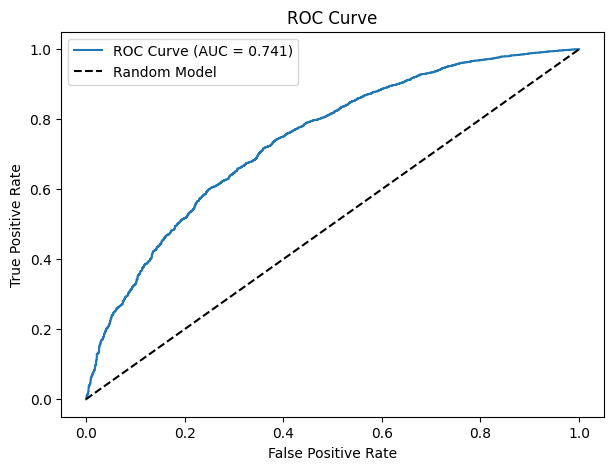

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [62]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
feature_importance = np.abs(shap_values).mean(axis=0)

In [63]:
shap_imp= pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

In [64]:
shap_imp.iloc[:10,:]

,Feature,Importance
114,SCORE_BAND_CR22_H,0.706098
19,NO_SCORE_y,0.343113
26,CREDIT_CARD_CR22,0.294119
4,RESIDENTIAL,0.237621
113,SCORE_BAND_CR22_G,0.208069
16,NO_SCORE_x,0.198496
146,CD_STS_RESIDENTIAL_y_R,0.193312
32,CREDIT_CARD_AMT_CR22,0.184416
3,LICENCE_AVAILABLE,0.173998
18,SCORE_CR22,0.164884


Text(0.5, 1.0, 'Top 10 important features')

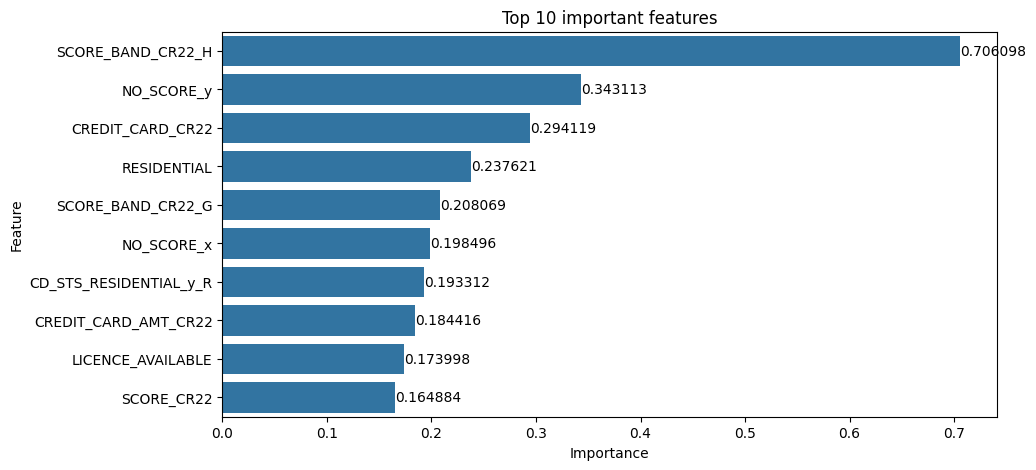

In [65]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Importance",y="Feature",data=shap_imp.iloc[:10,:])
plt.bar_label(ax.containers[0])
plt.title("Top 10 important features")

In [66]:
shap_imp

,Feature,Importance
114,SCORE_BAND_CR22_H,0.706098
19,NO_SCORE_y,0.343113
26,CREDIT_CARD_CR22,0.294119
4,RESIDENTIAL,0.237621
113,SCORE_BAND_CR22_G,0.208069
...,...,...
125,DOC_TYPE_Defence Force ID(picture card),0.000000
137,EMPLOYED_STATUS_Z,0.000000
134,EMPLOYED_STATUS_S,0.000000
147,CD_STS_RESIDENTIAL_y_W,0.000000


In [67]:
shap_imp = shap_imp.sort_values(by='Importance', ascending=False)

top_features = shap_imp['Feature'].head(10).tolist()

valid_features = [f for f in top_features if f in x.columns]

X_selected = x[valid_features]



In [68]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,train_size=0.80,random_state=42,stratify=y)

In [69]:
print(f"✓ X_train: {x_train.shape}")
print(f"✓ X_test: {x_test.shape}")
print(f"✓ y_train - Class 0: {sum(y_train==0)}, Class 1: {sum(y_train==1)}")

✓ X_train: (71588, 10)
✓ X_test: (17898, 10)
✓ y_train - Class 0: 5999, Class 1: 65589


In [70]:
# Create pipeline with SMOTE + Scaler + Model
pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42)),
    ('model', CatBoostClassifier( iterations=800,
        depth=5,
        learning_rate=0.05,
        loss_function='Logloss',
        eval_metric='AUC',random_state=42,verbose=100))
])

In [71]:
cat_model = pipeline.named_steps['model']

In [72]:
cat_model.fit(x_train,y_train)

0:	total: 285ms	remaining: 3m 47s
100:	total: 6.33s	remaining: 43.8s
200:	total: 11.2s	remaining: 33.4s
300:	total: 17.4s	remaining: 28.8s
400:	total: 23.1s	remaining: 23s
500:	total: 27.6s	remaining: 16.4s
600:	total: 34.8s	remaining: 11.5s
700:	total: 40.1s	remaining: 5.66s
799:	total: 45.2s	remaining: 0us


In [73]:
y_pred_test=cat_model.predict(x_test)

In [74]:
y_proba_test=cat_model.predict_proba(x_test)[:,1]

In [75]:
## Evaluation
print("Testing Classification Report:\n",classification_report(y_test,y_pred_test))
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))
print("Confusion Matrix:", confusion_matrix(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score',recall_score(y_test,y_pred_test))
print("Testing ROC AUC Score:",roc_auc_score(y_test,y_proba_test))

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.02      0.04      1500
           1       0.92      1.00      0.96     16398

    accuracy                           0.92     17898
   macro avg       0.68      0.51      0.50     17898
weighted avg       0.88      0.92      0.88     17898

Testing Accuracy: 0.9156330316236451
Confusion Matrix: [[   35  1465]
 [   45 16353]]
Precision Score: 0.9177797732629924
Recall Score 0.9972557628979144
Testing ROC AUC Score: 0.7347707443997236


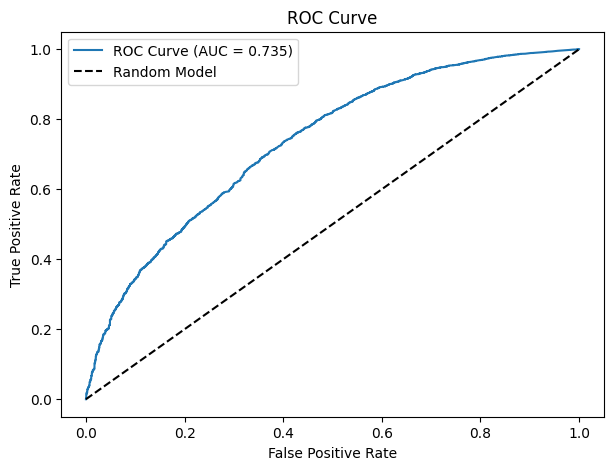

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [77]:
X_selected.to_csv('final_dataset.csv', index=False)

In [78]:
feature_names = merge_df_1.columns.tolist()

with open("data.pkl", "wb") as f:
    pickle.dump(feature_names, f)


NameError: name 'pickle' is not defined

In [ ]:
# In Python, run this:
import pickle


with open("credit_risk_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)
